In [2]:
from interview import InterviewV2
from population import Population
from survey import Survey, encode_image
import os

campaign_folder = "campaigns/apple"
assets = []
for image_filename in os.listdir(campaign_folder):
    # Check if the file is an image
    if image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        # Construct the full path to the image
        image_path = os.path.join(campaign_folder, image_filename)
        # You might want to encode the image for use in the survey here
        encoded_image = encode_image(image_path)
        # Append the encoded image to the assets list
        assets.append(encoded_image)
# Define campaign description, intent, and target audience
campaign_description = """
[In walk the drones]

"Today we celebrate the first glorious anniversary of the Information Purification Directives.

[Apple's hammer-thrower enters, pursued by storm troopers.]

We have created for the first time in all history a garden of pure ideology, where each worker may bloom, secure from the pests of any contradictory true thoughts.

Our Unification of Thoughts is more powerful a weapon than any fleet or army on earth.

We are one people, with one will, one resolve, one cause.

Our enemies shall talk themselves to death and we will bury them with their own confusion.

[Hammer is thrown at the screen]

We shall prevail!

[Boom!]

On January 24th Apple Computer will introduce Macintosh. And you'll see why 1984 won't be like '1984.'"
"""

campaign_intent = """
With our 1984 ad campaign, we aimed to set the Macintosh apart from competitors, establish our 
rebellious brand identity, and generate significant buzz. We position ourselves as champions 
of individuality and innovation against "Big Brother" conformity, intending to inspire people to
embrace a new era of personal computing.
"""
ages = [20, 25, 30, 35, 40, 45, 50]  # Example age range
incomes = [30000, 40000, 50000, 60000, 70000]  # Example income brackets
gender_distribution = 50  # Assuming a 50-50 gender split
interests = ['sports', 'music', 'art', 'technology', 'cooking', 'videogames', 'finance']  # Example interests
locations = ['New York', 'California', 'Texas', 'Florida', 'Illinois']  # Example locations
# Instantiate the Population class with the defined parameters
print("Creating a population")
my_population = Population(ages, incomes, gender_distribution, interests, locations, 5)
target_audience = my_population
print("Creating a survey")
# Create a survey
survey = Survey(assets, campaign_description, target_audience,campaign_intent)

# Print survey questions
print("Survey Questions:")
for i, question in enumerate(survey.get_questions(), start=1):
    print(f"Question {i}: {question}")
print("Conducting interview")
interview = InterviewV2(survey)
interview.mass_interview()

Creating a population
Creating a survey
Model for survey: gpt-4-vision-preview
Survey Questions:
Question 1: How effectively does the ad convey a sense of rebellion against conformity?
Question 2: In what ways do you think the ad campaign sets the Macintosh apart from its competitors?
Question 3: Does the ad make you feel inspired about the future of personal computing? Why or why not?
Question 4: How memorable is the "1984" concept in relation to Apple's brand identity?
Question 5: Do you feel that the imagery of the hammer
Question 6: thrower is a powerful symbol for innovation and individuality? Explain your answer.
Question 7: After watching the ad, how likely are you to associate Apple with freedom of thought and creativity?
Question 8: What emotions do you experience when you see the moment the hammer shatters the screen?
Question 9: Does the ad's narrative make you more interested in learning about the Macintosh? Why or why not?
Question 10: How do you perceive the portrayal of 

In [1]:
results = interview.get_results()
# Save the dict to a file for later use
print("Saving results to file")
with open("results.txt", "w") as file:
    file.write(str(results))
print(results)

NameError: name 'interview' is not defined

In [2]:
import requests
# Read and interpret as a dict
print("Reading results from file")
with open("results.txt", "r") as file:
    results = file.read()
print(results)
def embedding_api(text):
    url = "https://api.maisa.ai/v1/models/embeddings"

    payload = { "texts": [text] }
    headers = {
        "accept": "application/json",
        "content-type": "application/json",
        "X-API-Key": "sk_live_RKYM7Eu556TFugNpeTpZQE_aiEzPmQ8fUauXXTzxVmTF3"
    }

    response = requests.post(url, json=payload, headers=headers)
    return response.json()["embeddings"] 

def summary_api(hint, text):
    url = "https://api.maisa.ai/v1/capabilities/summarize"

    payload = {
        "format": "bullet",
        "length": "medium",
        "summary_hint": hint,
        "text": text
        }
    headers = {
        "accept": "application/json",
        "content-type": "application/json",
        "X-API-Key": "sk_live_RKYM7Eu556TFugNpeTpZQE_aiEzPmQ8fUauXXTzxVmTF3"
    }
    response = requests.post(url, json=payload, headers=headers)
    topics = response.json()["summary"].split("\n")  
    return topics    
    
def top_words(text, n):    
    topics = summary_api(f"The top {n} words mentioned by the users. Only one word per bullet point:  ", text)
    return topics
def top_n_topics(text, n):
    topics = summary_api(f"The top {n} topics mentioned by the users:", text)
    return topics
def top_good(text):
    topics = summary_api("The top 5 positive comments mentioned by the users:", text)
    return topics
def top_bad(text):
    topics = summary_api("The top 5 negative comments mentioned by the users. They should be things they didnt like or have a negative outlook on", text)
    return topics
# Convert the string to a dict
results = eval(results)

insights = []
i = 0	
for key, value in results.items():
    api_text = ""
    for key, value in value.items():
        i += 1
        api_text += f"Respuesta {i}:  {value} \n"
        
    insights.append(
        {
        f"question_{i}":{      
        "topics": top_n_topics(api_text, 5),
        "good": top_good(api_text),
        "bad": top_bad(api_text),
        "embeddings": embedding_api(api_text)
        }
        }    
    )
# save the insights to a file
with open("insights.txt", "w") as file:
    file.write(str(insights))


Reading results from file


Apple 1984
Tetris x Nintendo
BudLight

Top things mentions
Top 5 good and bad things

Social approval (Vegan Ecolgist, Feminst, Animalist, LGBTQ)




In [5]:
# Load the insights from the file
with open("insights.txt", "r") as file:
    insights = file.read()
# Convert the string to a dict
insights = eval(insights)

def top_words(text, n):    
    topics = summary_api(f"The top {n} words mentioned by the users. Only one word per bullet point, dont give multiple words in a line. Only {n} words in total:  ", text)
    return topics


good = [value["good"] for question in insights for key, value in question.items()]
bad = [value["bad"] for question in insights for key, value in question.items()]
topic = [value["topics"] for question in insights for key, value in question.items()]
    
print(top_good(str(good)))
best_things = top_good(str(good))
worst_things = top_bad(str(bad))
topics = top_n_topics(str(topic), 5)
words = top_words(str(topic), 5)
# Save the metrics
metrics = {
    "best_things": best_things,
    "worst_things": worst_things,
    "topics": topics,
    "words": words
}
with open("metrics.txt", "w") as file:
    file.write(str(metrics))


['- The ad effectively uses visual metaphors to represent breaking free from control and appeals to individuals who value personal freedom and creativity.', '- The Macintosh ad campaign promotes individuality and change, positioning it as a symbol of rebellion and individuality.', '- It presents the Macintosh as a symbol of innovation and revolution in technology.', '- The ad represents Apple as a symbol of innovation and individualism, setting them apart from competitors.', '- It resonates with the idea of combating conformity, associating Apple with freedom of thought and creativity.']


In [1]:
import requests
def embedding_api(text):
    url = "https://api.maisa.ai/v1/models/embeddings"

    payload = { "texts": [text] }
    headers = {
        "accept": "application/json",
        "content-type": "application/json",
        "X-API-Key": "sk_live_RKYM7Eu556TFugNpeTpZQE_aiEzPmQ8fUauXXTzxVmTF3"
    }
    response = requests.post(url, json=payload, headers=headers)
    response.raise_for_status()
    print(response.json())
    return response.json().get("embeddings", None)
with open("metrics.txt", "r") as file:
    metrics = file.read()
metrics = eval(metrics)
print(metrics)

print(metrics["words"])
words = metrics["words"]
word_embedding = {}
for word in words:
    word_embedding[word] = embedding_api(word)

{'best_things': ["- Apple's ad campaign is praised for its portrayal of rebellion against conformity and positioning of Apple as an innovative disruptor.", '- The Macintosh ad campaign promotes individuality and change, positioning it as a symbol of rebellion and personal empowerment.', '- The campaign effectively captures attention by portraying breaking away from conformity and championing individuality.', '- The ads present the Macintosh as a symbol of innovation and revolution in technology.', '- The ads resonate with individuals who value creativity and breaking free from conformity.'], 'worst_things': ['- Users find the portrayal of the Macintosh as a revolution and breakthrough to be exaggerated or unrealistic.', "- The ad campaign's positioning of the Macintosh as a symbol of rebellion and individuality may not resonate with everyone.", '- Some users find the suggestion that using a Macintosh is an act of rebellion against the norm to be off-putting or unnecessary.', "- The ad'

In [2]:

word_embedding 
# print(word_embedding["- Premium"])
# Load insights from file
with open("insights.txt", "r") as file:
    insights = file.read()

insights = eval(insights)

questions_embeding = [value["embeddings"] for question in insights for key, value in question.items()]
import numpy as np

# What is the shape of questions_embeding?
relevance = []
for key,value in word_embedding.items():
    word_em = np.array(value).flatten() 
    sum =0
    for question in questions_embeding:
        # print(np.array(question).shape)
        question = np.array(question).flatten()
        # print(f" word_emb: {word_em.shape} question: {question.shape} ")
        # Cosine similarity between the question and the word "premium"
        # print(np.dot(question, word_em) / (np.linalg.norm(question) * np.linalg.norm(word_em)))
        sum += np.dot(question, word_em) / (np.linalg.norm(question) * np.linalg.norm(word_em))
    relevance.append(sum)
print(relevance)
    


[2.330475272705481, 3.7868309241894638, 3.2094957146539427, 2.597903764949865, 2.8042936470970488]


/tmp/ipykernel_3605/3711075916.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='relevance', y='words', data=df, palette='viridis')


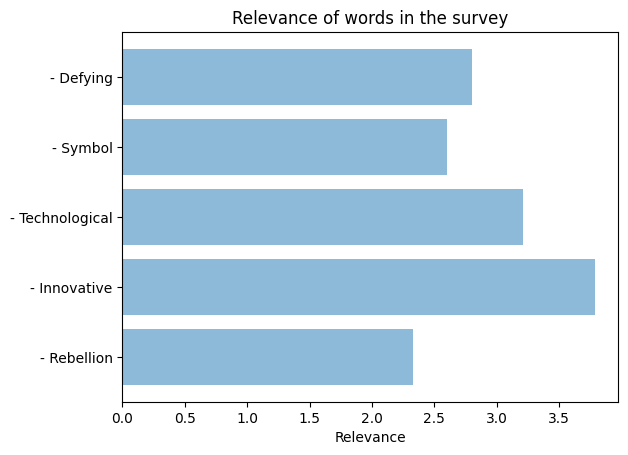

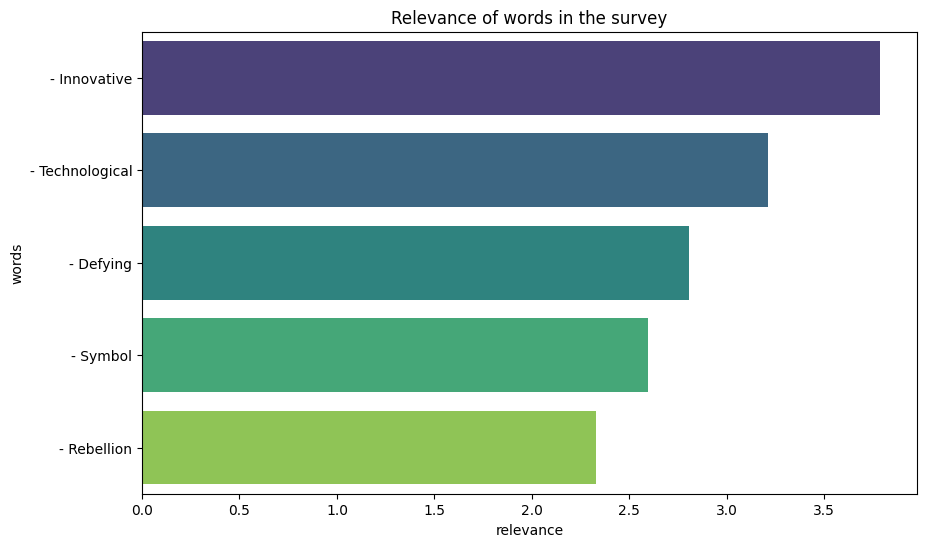

In [4]:
# do a bar plot with the relevance
import matplotlib.pyplot as plt
import numpy as np
relevance
words = list(word_embedding.keys())
y_pos = np.arange(len(words))
plt.barh(y_pos, relevance, align='center', alpha=0.5)
plt.yticks(y_pos, words)
plt.xlabel('Relevance')
plt.title('Relevance of words in the survey')

# Do the graph in seaborn
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'words': words, 'relevance': relevance})
df = df.sort_values(by='relevance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='relevance', y='words', data=df, palette='viridis')
plt.title('Relevance of words in the survey')
plt.show()
